In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

In [3]:
data_path = "/Users/zhangjianfeng/workspaces/workspace_github_bg/mysparkmllib/data/PCA/testSet.txt"

In [4]:
dataMat = loadDataSet(data_path)

In [5]:
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [7]:
import numpy as np
x = np.array([3,1,2])

In [8]:
x

array([3, 1, 2])

In [9]:
np.argsort(x)

array([1, 2, 0])

In [10]:
y = np.argsort(x)

In [11]:
y

array([1, 2, 0])

In [12]:
y[::-1]

array([0, 2, 1])

In [13]:
y[:-3:-1]

array([0, 2])

In [14]:
y[:-6:-1]

array([0, 2, 1])

In [15]:
# >>> alist = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# >>> alist[-1: -5: -1]
# [9, 8, 7, 6]
# >>> alist[9: 5: -1]
# [9, 8, 7, 6]
# >>> alist[-1:1:-1]
# [9, 8, 7, 6, 5, 4, 3, 2]
# >>> alist[6:-8:-1]
# [6, 5, 4, 3]


In [16]:
def pca(dataMat, topNfeat=9999999):
    """pca

    Args:
        dataMat   原数据集矩阵
        topNfeat  应用的N个特征
    Returns:
        lowDDataMat  降维后数据集
        reconMat     新的数据集空间
    """

    # 计算每一列的均值
    meanVals = mean(dataMat, axis=0)
    # print('meanVals', meanVals)

    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # print('meanRemoved=', meanRemoved)

    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度

    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = cov(meanRemoved, rowvar=0)

    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = linalg.eig(mat(covMat))
    print('eigVals=', eigVals)
    print('eigVects=', eigVects)
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    eigValInd = argsort(eigVals)
    print('eigValInd1=', eigValInd)

    # -1表示倒序，返回topN的特征值[-1 到 -(topNfeat+1) 但是不包括-(topNfeat+1)本身的倒叙]
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    print('eigValInd2=', eigValInd)
    # 重组 eigVects 最大到最小
    redEigVects = eigVects[:, eigValInd]
    print('redEigVects=', redEigVects.T)
    # 将数据转换到新空间
    print( "---", shape(meanRemoved), shape(redEigVects))
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    print('lowDDataMat=', lowDDataMat)
    print('reconMat=', reconMat)
    return lowDDataMat, reconMat

In [17]:
# 只需要1个特征向量
lowDmat, reconMat = pca(dataMat, 1)

eigVals= [0.36651371 2.89713496]
eigVects= [[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]]
eigValInd1= [0 1]
eigValInd2= [1]
redEigVects= [[-0.52045195 -0.85389096]]
--- (1000, 2) (2, 1)
lowDDataMat= [[-2.51033597e+00]
 [-2.86915379e+00]
 [ 9.74108510e-02]
 [-7.67782222e-01]
 [ 1.02715333e+00]
 [-1.44409178e+00]
 [-2.17360352e+00]
 [-7.73998803e-01]
 [-1.09983463e+00]
 [-1.70275987e+00]
 [-5.39605615e-01]
 [-9.15572638e-01]
 [-2.42669452e+00]
 [ 2.93613464e+00]
 [ 3.92702506e-01]
 [ 2.59205734e+00]
 [ 4.96435625e-01]
 [-1.52069930e+00]
 [ 1.25471104e-01]
 [ 1.41846162e+00]
 [ 5.89902904e-01]
 [ 6.69601540e-01]
 [ 3.25466068e-01]
 [ 1.18812333e+00]
 [ 2.07790920e+00]
 [ 3.24938650e-01]
 [ 3.41109884e+00]
 [ 1.92249899e+00]
 [-6.57788287e-01]
 [-3.56836313e-01]
 [ 5.72240108e-02]
 [ 1.13444036e+00]
 [-2.47196176e-01]
 [ 1.14678135e+00]
 [ 1.62503940e+00]
 [-2.11489136e+00]
 [ 1.62262452e+00]
 [ 1.56716102e+00]
 [ 2.08128929e+00]
 [-1.87248397e+00]
 [-2.59122644e-01]
 [ 3.27554269e

In [18]:
#  只需要2个特征向量，和原始数据一致，没任何变化
lowDmat, reconMat = pca(dataMat, 2)

eigVals= [0.36651371 2.89713496]
eigVects= [[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]]
eigValInd1= [0 1]
eigValInd2= [1 0]
redEigVects= [[-0.52045195 -0.85389096]
 [-0.85389096  0.52045195]]
--- (1000, 2) (2, 2)
lowDDataMat= [[-2.51033597  0.15840394]
 [-2.86915379  0.5092619 ]
 [ 0.09741085 -0.20728318]
 ...
 [-0.50166225 -0.62056456]
 [-0.05898712 -0.02335614]
 [-0.18978714 -1.37276015]]
reconMat= [[10.235186 11.321997]
 [10.122339 11.810993]
 [ 9.190236  8.904943]
 ...
 [ 9.854922  9.201393]
 [ 9.11458   9.134215]
 [10.334899  8.543604]]


In [19]:
lowDmat

matrix([[-2.51033597,  0.15840394],
        [-2.86915379,  0.5092619 ],
        [ 0.09741085, -0.20728318],
        ...,
        [-0.50166225, -0.62056456],
        [-0.05898712, -0.02335614],
        [-0.18978714, -1.37276015]])

In [20]:
def show_picture(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
    ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
    plt.show()

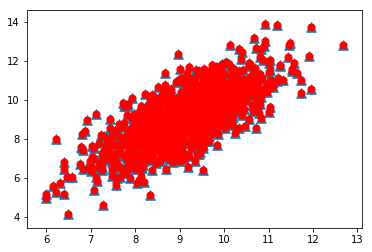

In [21]:
 show_picture(dataMat, reconMat)

In [22]:
def replaceNanWithMean():
    datMat = loadDataSet('/Users/zhangjianfeng/workspaces/workspace_github_ai/AiLearning/db/13.PCA/secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        # .A 返回矩阵基于的数组
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        # 将value为NaN的值赋值为均值
        datMat[nonzero(isnan(datMat[:, i].A))[0],i] = meanVal
    return datMat

In [26]:
 # 利用PCA对半导体制造数据降维
dataMat = replaceNanWithMean()
 print(shape(dataMat))


(1567, 590)


In [25]:
def analyse_data(dataMat):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat-meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigvals, eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigvals)

    topNfeat = 20
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    cov_all_score = float(sum(eigvals))
    sum_cov_score = 0
    for i in range(0, len(eigValInd)):
        line_cov_score = float(eigvals[eigValInd[i]])
        sum_cov_score += line_cov_score
        '''
        我们发现其中有超过20%的特征值都是0。
        这就意味着这些特征都是其他特征的副本，也就是说，它们可以通过其他特征来表示，而本身并没有提供额外的信息。

        最前面15个值的数量级大于10^5，实际上那以后的值都变得非常小。
        这就相当于告诉我们只有部分重要特征，重要特征的数目也很快就会下降。

        最后，我们可能会注意到有一些小的负值，他们主要源自数值误差应该四舍五入成0.
        '''
        print('主成分：%s, 方差占比：%s%%, 累积方差占比：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))


主成分： 1, 方差占比：59.25%, 累积方差占比：59.3%
主成分： 2, 方差占比：24.12%, 累积方差占比：83.4%
主成分： 3, 方差占比：9.15%, 累积方差占比：92.5%
主成分： 4, 方差占比：2.30%, 累积方差占比：94.8%
主成分： 5, 方差占比：1.46%, 累积方差占比：96.3%
主成分： 6, 方差占比：0.52%, 累积方差占比：96.8%
主成分： 7, 方差占比：0.32%, 累积方差占比：97.1%
主成分： 8, 方差占比：0.31%, 累积方差占比：97.4%
主成分： 9, 方差占比：0.26%, 累积方差占比：97.7%
主成分：10, 方差占比：0.23%, 累积方差占比：97.9%
主成分：11, 方差占比：0.22%, 累积方差占比：98.2%
主成分：12, 方差占比：0.21%, 累积方差占比：98.4%
主成分：13, 方差占比：0.17%, 累积方差占比：98.5%
主成分：14, 方差占比：0.13%, 累积方差占比：98.7%
主成分：15, 方差占比：0.12%, 累积方差占比：98.8%
主成分：16, 方差占比：0.11%, 累积方差占比：98.9%
主成分：17, 方差占比：0.11%, 累积方差占比：99.0%
主成分：18, 方差占比：0.09%, 累积方差占比：99.1%
主成分：19, 方差占比：0.09%, 累积方差占比：99.2%
主成分：20, 方差占比：0.09%, 累积方差占比：99.3%
eigVals= [ 5.34151979e+07  2.17466719e+07  8.24837662e+06  2.07388086e+06
  1.31540439e+06  4.67693557e+05  2.90863555e+05  2.83668601e+05
  2.37155830e+05  2.08513836e+05  1.96098849e+05  1.86856549e+05
  1.52422354e+05  1.13215032e+05  1.08493848e+05  1.02849533e+05
  1.00166164e+05  8.33473762e+04  8.15850591e+04  7.76560524e+04
  6.

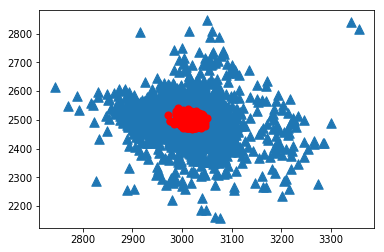

In [27]:
# 分析数据
analyse_data(dataMat)
lowDmat, reconMat = pca(dataMat, 20)
print(shape(lowDmat))
show_picture(dataMat, reconMat)